In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt 
# install pydot and graphviz

Using TensorFlow backend.


In [2]:
# 载入数据
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# (60000,28,28) --> (60000,28,28,1)
x_train = x_train.reshape(-1, 28, 28, 1)/255.0  # -1 表示自动匹配
x_test = x_test.reshape(-1, 28, 28, 1)/255.0  # 除255 转换到　0-1　之间

#　换 one-hot 格式
y_train = np_utils.to_categorical(y_train,num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

# 定义顺序模型
model = Sequential()

# 第一个卷积层
# input_shape 输入平面
# filters 卷积核/滤波器个数
# kernel_size 卷积窗口大小
# strides 步长
# padding padding方式　same/valid
# activation 激活函数
model.add(Convolution2D(
    input_shape = (28,28,1),
    filters = 32,
    kernel_size = 5,
    strides = 1,
    padding = 'same',
    activation = 'relu',
    name = 'conv1'
))

# 第一个池化层
model.add(MaxPooling2D(
    pool_size = 2,
    strides = 2,
    padding = 'same',
    name = 'pool1'
))

# 第二个卷积层
model.add(Convolution2D(
    64,
    5,
    strides=1,
    padding='same',
    activation='relu',
    name = 'conv2'
))

# 第二个池化层
model.add(MaxPooling2D(
    2,
    2,
    'same',
    name = 'pool2'
))

# 把第二个池化层的输出扁平化为　１　维
model.add(Flatten())

# 第一个全连接层
model.add(Dense(1024,activation='relu'))

# Dropout
model.add(Dropout(0.5))

# 第二个全连接层
model.add(Dense(10,activation='softmax'))

# # 定义优化器
# adam = Adam(lr=1e-4)
#
# # 定义优化器， loss function, 训练过程中计算准确率
# model.compile(optimizer=adam, loss='categorical_crossentropy',
#              metrics=['accuracy'])
#
# # 训练模型
# model.fit(x_train, y_train,batch_size=64,epochs=10)
#
# # 评估模型
# loss, accuracy = model.evaluate(x_test, y_test)
#
# print('test loss:', loss)
# print('test accuracy:', accuracy)


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


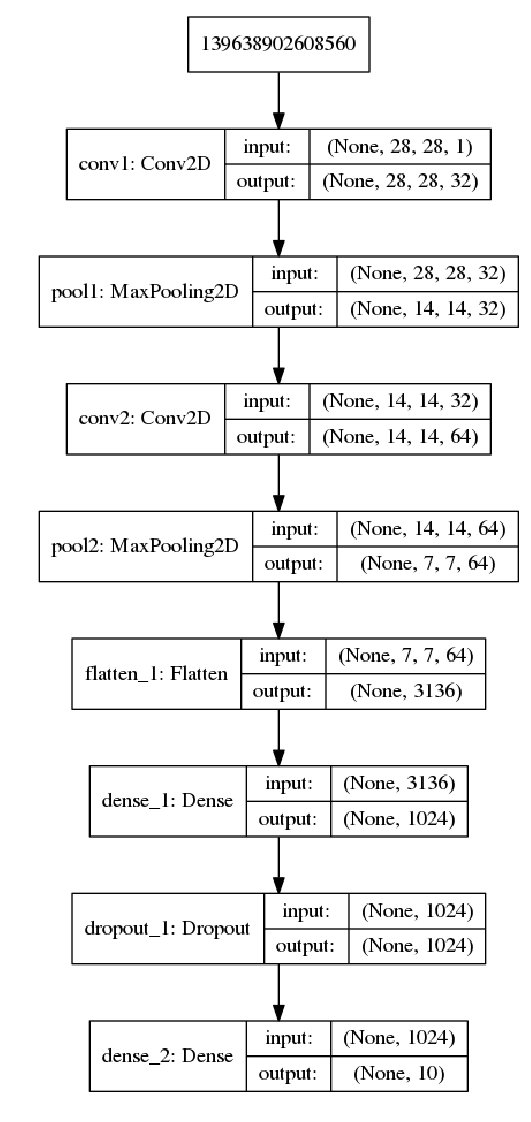

In [9]:
plot_model(model, to_file='modelTopToBottom.png', show_shapes=True, show_layer_names=True,rankdir='TB')
plt.figure(figsize=(20,20))
img = plt.imread('modelTopToBottom.png')
plt.imshow(img)
plt.axis('off')
plt.show()

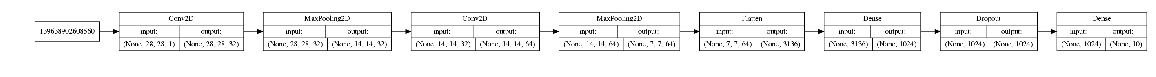

In [10]:
plot_model(model, to_file='modelLeftToRight.png', show_shapes=True, show_layer_names=False,rankdir='LR')
plt.figure(figsize=(20,20))
img = plt.imread('modelLeftToRight.png')
plt.imshow(img)
plt.axis('off')
plt.show()